# Least Squares Estimation

This notebook will take the reader through least squares estimation. We will outline what least squares is, after we have done this we will run through least squares from a matematical perspective, we'll then take a look at it from a computational perspective before providing some questions for you as the student to answer.

https://pythonnumericalmethods.berkeley.edu/notebooks/chapter16.04-Least-Squares-Regression-in-Python.html helpful notebook.


## What is least squares?

Assume $y$ to be distrbuted according to some $mathcal{N}(f(X) , \epsilon I)$, where I is some residual error and $f(X)$ represents some true underlying function. This means we can think of the errors as being distributed according to $\mathcal{N}(f(x) - y, \epsilon I)$.

This means that to find the optimal $f(X)$ we wish to mimise the average of losses over all of the data otherwise known as the empirical risk. 

$$\min_{theta \in \mathbb{R}^D} \frac{1}{N} \sum_{n=1}^N(y_n - f(x_n, \theta))^2$$

When performing least squares we substitute our predictor for a linear predictor $f(x_n, \theta) = \theta^T x_n$ which gives us the optimisation problem

$$\min_{theta \in \mathbb{R}^D} \frac{1}{N} \sum_{n=1}^N(y_n - \theta^T x_n)^2$$

Expressed in matrix form this is

$$\min_{theta \in \mathbb{R}^D} \frac{1}{N} ||Y - \theta^T X||^2$$

NB. Think Moore-Penrose Inverse where is min and hence how would you calculate least squares analytically.



## Computing least squares

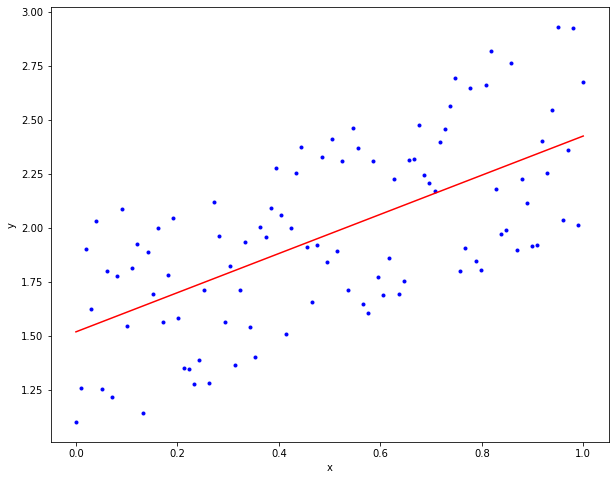

In [13]:
import numpy as np
from scipy.optimize import least_squares
import matplotlib.pyplot as plt

#
def fun_rosenbrock(x):
    return np.array([10 * (x[1] - x[0]**2), (1 - x[0])])

# Set up parameters to generate data
mu = 2
sigma = 5
N = 100

# Generate some data
x = np.linspace(0, 1, N)
e = np.random.normal(mu, sigma ,N)
y = 1 + x + np.random.random(N)

# assemble matrix A
A = np.vstack([x, np.ones(len(x))]).T

# turn y into a column vector
y = y[:, np.newaxis]

# Direct least square regression
alpha = np.dot((np.dot(np.linalg.inv(np.dot(A.T,A)),A.T)),y)

# plot the results
plt.figure(figsize = (10,8))
plt.plot(x, y, 'b.')
plt.plot(x, alpha[0]*x + alpha[1], 'r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

### Moore-penrose inverse

$Ax=b \implies A^TAx=A^Tb \implies x = (A^TA)^{-1}A^Tb$

In [15]:
# Compute the (Moore-Penrose) pseudo-inverse of a matrix.
pinv = np.linalg.pinv(A)
alpha = pinv.dot(y)
print(alpha)

[[0.90797401]
 [1.51777217]]


### Using scipy

In [32]:
from scipy.optimize import least_squares

# Define loss function to optimise
def loss_function(theta, X, y):
    val = 0
    for i in range(len(y)):
        val += (y[i] - np.dot(X[i],theta))**2
    return 1/len(y)*val
    
theta_0 = [0.90797401, 1.51777217]

least_squares(loss_function, theta_0, args=(A,y))

 active_mask: array([0., 0.])
        cost: 0.005030453552800494
         fun: array([0.10030407])
        grad: array([8.40739029e-10, 2.70810059e-09])
         jac: array([[8.38190317e-09, 2.69989094e-08]])
     message: '`gtol` termination condition is satisfied.'
        nfev: 1
        njev: 1
  optimality: 2.7081005875470833e-09
      status: 1
     success: True
           x: array([0.90797401, 1.51777217])